# Chapter 2. The Simple Regression Model

We are concerned with estimating the population parameters &beta;0 and &beta;1 of the simple linear regression model

\begin{equation}
y=\beta_0 + \beta_1 +u
\tag{2.1}
\end{equation}

Where Y and X are the dependent and independent variable respectively. Also sometimes called Response and Control variable respectively.

The variable u, called the error term or disturbance in the relationship, represents factors other than x that affect y. A simple regression analysis effectively treats all factors affecting y other than x as being unobserved. Thus you can usefully think of u as standing for "unobserved".

Equation (2.1) also states a linear relationship between y and x. If the other factors in u are held fixed, so that the change in u is zero then x has a linear effect on y.

\begin{equation}
\Delta y=\Delta \beta_1  \quad if \Delta u =0
\tag{2.2}
\end{equation}

This means that &beta;1 is the slope parameter in the relationship between y and x, holding the other parameters in u fixed.

 ### Wooldridge. Example 2.1 Soybean Yield and Fertilizer

Supposse that soybean yield is determined by the model

\begin{equation}
yield=\beta_0 + \beta_1 * fertilizer +u
\tag{2.3}
\end{equation}

The researcher is interested in the effect of fertilizer on yield, holding other factors fixed. This effect is given by &beta;1. The error term u contains factors such as land, quality, rainfall and so on. The coefficient &beta;1 neasures the effect of fertilizer on yield, holding other factors fixed: &Delta;yield=&Beta;1*&Delta;fertilizer

 ### Wooldridge. Example 2.2 A Simple Wage Equation

A model related a person's wage to observed education and other unobserved factors is

\begin{equation}
wage=\beta_0 + \beta_1 * educ +u
\tag{2.4}
\end{equation}

If wage is measured in dollars per hour and educ is years of education, then &beta;1 measures the change in hourly wage given another year of education, holding all other factors fixed. Some of those factors include labor force experience, innate ability, tenure with current employer, work ethic among many others.

A crucial assumption is that the average value of u does not depend on the value of x. We can write this assumption as

\begin{equation}
E(u|x)=E(u)
\tag{2.6}
\end{equation}

Equation (2.6) says that the average value of the unobservables is the same accross all slices of the population determined by the value of x.

In the Simple Wage (Example 2.2), Equation (2.6) requires that the average level of ability is the same regardless of years of education. For example, if E(abil|8) denotes the average ability for the group of all people with eight years of education, and E(abil|16) denotes the average ability among people with sixteen years of education, then equation (2.6) implies that these must be the same. 

If, for example, we think that average ability increases with years of education, then equation (2.6) is false. This would happen for instance if people with more ability chose to be more educated. As we cannot observe innate ability, we have no way of knowing whether or not average ability is the same for all education levels.

## 2-2 Deriving the Ordinary Least Squares Estimates

from a random sample of y and x. According to Wooldridge (2016, section 2.2) the ordinary least (OLS) estimators are

\begin{equation}
\tag{2.17}
\hat{\beta_0}=\hat{y}-\hat{\beta_1}\hat{x}
\end{equation}

\begin{equation}
\tag{2.19 a}
\hat{\beta_1}=\frac{\sum_{i=1}^n (x_i-\vec{x})(y_i-\vec{y})}{\sum_{i=1}^n(x_i-\vec{x})^2}
\end{equation}

\begin{equation}
\tag{2.19 b}
\hat{\beta_1}=\frac{Cov(x,y)}{Var(x}
\end{equation}

Based in these estimated parameters, the OLS regression line is

\begin{equation}
\hat{y}=\hat{\beta_0} + \hat{\beta_1}x
\tag{2.1}
\end{equation}

Thus, for a given sample, we just need to calculate four statistics yHAT, xHAT, Cov(x,y) and Var(x) and plug them into the previous equation. 

### Wooldridge. Example 2.3 CEO Salary and Return on Equity

For the population of chief executive officer, let y be the annual salary (salary) in thousands of dollars. Let x be the average return on equity (roe) for the CEO's firm for the previous three years. To study the relationship between this measure of firm performance and CEO compensation, we postulate the simple model

\begin{equation}
salary=\beta_0 + \beta_1 * roe +u
\end{equation}

the slope parameter beta1; measures the change in annual salary, in thousands of dollars, when return on equity increases by one percentage point. 

We are using the data set CEOSAL1.dta. We then calculate the four statistics we need for equations 2.17 and 2.19a

In [1]:
require(foreign)
ceosal1<-read.dta("https://github.com/thousandoaks/Wooldridge/blob/master/ceosal1.dta?raw=true")
attach(ceosal1)
head(ceosal1)


Loading required package: foreign



,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1095,20,27595.0,14.1,106.4,191,1,0,0,0,6.998509,10.225389
2,1001,32,9958.0,10.9,-30.6,13,1,0,0,0,6.908755,9.206132
3,1122,9,6125.9,23.5,-16.3,14,1,0,0,0,7.022868,8.720281
4,578,-9,16246.0,5.9,-25.7,-21,1,0,0,0,6.359574,9.695602
5,1368,7,21783.2,13.8,-3.0,56,1,0,0,0,7.221105,9.988894
6,1145,5,6021.4,20.0,1.0,55,1,0,0,0,7.043160,8.703075


In [2]:
# ingredients to the OLS formulas 
cat("Cov(roe, salary):",cov(roe,salary))
cat("\nVar ROE:",var(roe))
cat("\nMean Salary:",mean(salary))
cat("\nMean ROE:",mean(roe))

# manual calculation of OLS coefficients 
cat("\nb1hat:",( b1hat <- cov(roe,salary)/var(roe) ))
cat("\nb0hat:",( b0hat <- mean(salary) - b1hat*mean(roe) ))

# "detach" the data frame


Cov(roe, salary): 1342.538
Var ROE: 72.56499
Mean Salary: 1281.12
Mean ROE: 17.18421
b1hat: 18.50119
b0hat: 963.1913

So the OLS regression line is

\begin{equation}
\hat{salary}=963.1913 + 18.50119 * roe
\end{equation}

Thus we see that if the return of equity is zero (roe=0) then the predicted salary is the intercept, 963.191, or 963191 dollars. We also observe that if roe increases by one percentage point then salary is about to change by 18.50, or $18500. 

### Wooldridge. Example 2.3 CEO Salary and Return on Equity (cont.)

There is a more convenient way to compute the coefficients using R. Following with the previous example:

In [3]:
lm(ceosal1$salary~ceosal1$roe)


Call:
lm(formula = ceosal1$salary ~ ceosal1$roe)

Coefficients:
(Intercept)  ceosal1$roe  
      963.2         18.5  


### Wooldridge. Example 2.3 CEO Salary and Return on Equity (cont.)

A useful feature of R is the ability to store the output of the execution of lm in a object for further use, for instance to plot the regresion line

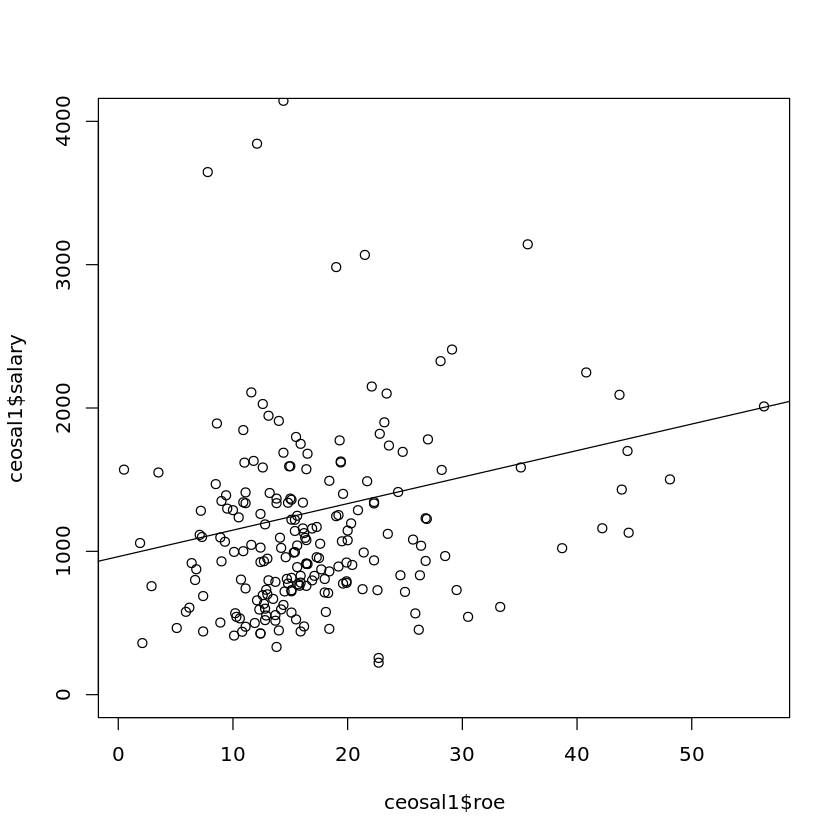

In [4]:
library(foreign)
ceosal1<-read.dta("https://github.com/thousandoaks/Wooldridge/blob/master/ceosal1.dta?raw=true")

# OLS regression
CEOregres <- lm( salary ~ roe, data=ceosal1 )

# Scatter plot (restrict y axis limits)
plot(ceosal1$roe, ceosal1$salary, ylim=c(0,4000))

# Add OLS regression line
abline(CEOregres)


### Wooldridge. Example 2.4 Wage and Education

We are using the data set in WAGE1.dta We are interested in studying the relation between education and wage. Thus

\begin{equation}
wage=\beta_0 + \beta_1 * education +u
\end{equation}

In [5]:
library(foreign)
wage1<-read.dta("https://github.com/thousandoaks/Wooldridge/blob/master/wage1.dta?raw=true")

head(wage1)

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,⋯,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.10,11,2,0,0,1,0,2,1,0,⋯,0,0,0,0,0,0,0,1.131402,4,0
2,3.24,12,22,2,0,1,1,3,1,0,⋯,0,0,1,0,0,0,1,1.175573,484,4
3,3.00,11,2,0,0,0,0,2,0,0,⋯,0,1,0,0,0,0,0,1.098612,4,0
4,6.00,8,44,28,0,0,1,0,1,0,⋯,0,0,0,0,0,1,0,1.791759,1936,784
5,5.30,12,7,2,0,0,1,1,0,0,⋯,0,0,0,0,0,0,0,1.667707,49,4
6,8.75,16,9,8,0,0,1,0,1,0,⋯,0,0,0,1,1,0,0,2.169054,81,64


In [6]:
# OLS regression:
lm(wage ~ educ, data=wage1)


Call:
lm(formula = wage ~ educ, data = wage1)

Coefficients:
(Intercept)         educ  
    -0.9049       0.5414  


Given the previous results, we conclude that one additional year of education is associated with an increase of the typical wage by about 54 cents an hour

### Wooldridge. Example 2.5 Voting Outcomes and Campaign Expenditures

The file VOTE1 contains data on election outcomes and campaign expenditures for 173 two-party races for the US. House of Representatives in 1998. There are two candidates in each race A and B. Let the voteA be the percentage of the vote received by CandidateA and share A be the percentage of total campaign expenditure accounted for by CandidateA. 

We can estimate a simple regression model to find out whether spending more relative to one's challenger implies a higher percentage of the vote. Thus we entertain a model of the form.

\begin{equation}
voteA=\beta_0 + \beta_1 * shareA +u
\end{equation}


Call:
lm(formula = voteA ~ shareA, data = vote1)

Coefficients:
(Intercept)       shareA  
    26.8125       0.4638  


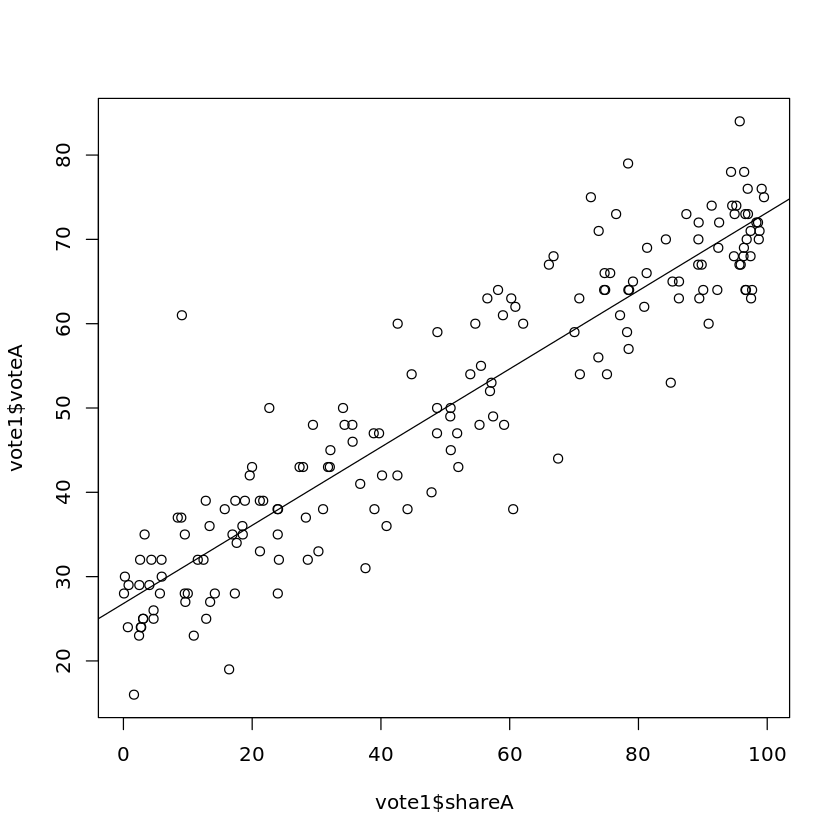

In [7]:
require(foreign)
vote1<-read.dta("https://github.com/thousandoaks/Wooldridge/blob/master/vote1.dta?raw=true")

# OLS regression (parentheses for immediate output):
( VOTEres <- lm(voteA ~ shareA, data=vote1) )

# scatter plot with regression line:
plot(vote1$shareA, vote1$voteA)
abline(VOTEres)

This means that if Candidate A's share of spending increases by one percentage point, Candidate A receives almost one-half a percentage point (0.464) more of the total vote.

## 2-3 Properties of OLS on Any Sample of Data

### 2-3a Coefficients, Fitted Values and Residuals

The object returned by lm contains all relevant information on the regression. 

### Wooldridge. Example 2.6 CEO Salary and Return on Equity (Option A)

In [8]:
require(foreign)
ceosal1<-read.dta("https://github.com/thousandoaks/Wooldridge/blob/master/ceosal1.dta?raw=true")

# extract variables as vectors:
sal <- ceosal1$salary
roe <- ceosal1$roe

# regression with vectors:
CEOregres <- lm( sal ~ roe  )

# obtain predicted values and residuals
sal.hat <- fitted(CEOregres)
u.hat <- resid(CEOregres)

# Wooldridge, Table 2.2: 
cbind(roe, sal, sal.hat, u.hat)[1:15,]


,roe,sal,sal.hat,u.hat
1,14.1,1095,1224.058,-129.058071
2,10.9,1001,1164.854,-163.854261
3,23.5,1122,1397.969,-275.969216
4,5.9,578,1072.348,-494.348338
5,13.8,1368,1218.508,149.492288
6,20.0,1145,1333.215,-188.215063
7,16.4,1078,1266.611,-188.610785
8,16.3,1094,1264.761,-170.760660
9,10.5,1237,1157.454,79.546207
10,26.3,833,1449.773,-616.772523


### Wooldridge. Example 2.6 CEO Salary and Return on Equity (Option B)

In [9]:
names(CEOregres)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [10]:
require(foreign)
ceosal1<-read.dta("https://github.com/thousandoaks/Wooldridge/blob/master/ceosal1.dta?raw=true")

# extract variables as vectors:
sal <- ceosal1$salary
roe <- ceosal1$roe

# regression with vectors:
CEOregres <- lm( sal ~ roe  )

# obtain predicted values and residuals
sal.hat <- CEOregres$fitted.values
u.hat <- CEOregres$residuals

# Wooldridge, Table 2.2: 
cbind(roe, sal, sal.hat, u.hat)[1:15,]


,roe,sal,sal.hat,u.hat
1,14.1,1095,1224.058,-129.058071
2,10.9,1001,1164.854,-163.854261
3,23.5,1122,1397.969,-275.969216
4,5.9,578,1072.348,-494.348338
5,13.8,1368,1218.508,149.492288
6,20.0,1145,1333.215,-188.215063
7,16.4,1078,1266.611,-188.610785
8,16.3,1094,1264.761,-170.760660
9,10.5,1237,1157.454,79.546207
10,26.3,833,1449.773,-616.772523


### 2-3b Algebraic properties of OLS statistics

Writing each Y_i as its fitted value, plus its residual, provides another way to interpret an OLS regression. For each i, write

\begin{equation}
y_i=\hat{y_i}+\hat{u_i}
\end{equation}

Thus we can view OLS as decomposing each Yi into two parts, a fitted valueand a residual. The fitted values and residuals are uncorrelated in the sample.

Wooldridge defines the total sum of squares (SST),the explained sum of squares (SSE), and the residual sum of squares (SSR) as follows:

\begin{equation}
\tag{2.33}
SST=\sum_{i=1}^n (y_i-\vec{y})^2
\end{equation}

\begin{equation}
\tag{2.34}
SSE=\sum_{i=1}^n (\hat{y_i}-\vec{y_i})^2
\end{equation}

\begin{equation}
\tag{2.35}
SSR=\sum_{i=1}^n \hat{u_i}^2
\end{equation}

SST is a measure of the total sample variation in the Yi, this is, a measure of how spread out the Yi are in the sample. Similarly SSE measures the sample variation in the Yhati, and SSR measures the sample variation in the uhati. The total variation in y can always be expressed as the sum of the explained variation and the unexplained variation SSR, Thus,

\begin{equation}
\tag{2.36}
SST= SSE+ SSR
\end{equation}

### 2-3c Goodness-of-Fit

So far, we have no way of measuring how well the explanatory or independent variable, x, explains the dependent variable, y. 

Assuming that the total sum of squares, SST, is not equal to zero we can divide (2.36) by SST to get 1=SSE/SST+SSR/SST. The R-squared of the regression, sometimes called the coefficient of determination, is defined as

\begin{equation}
\tag{2.38}
R^2:= SSE/SST = 1-SSR/SST = 1- \frac{Var(\hat{u})}{Var(y)}
\end{equation}

R^2 is the ratio of the explained variation compared to the total variation. Thus it is interpreted as the fraction of the sample variation in y that is explained by x. 

If the data points all lie on the same line, OLS provides a perfect fit to the data. In this case, R^2=1. A value of R^2 that is nearly equal to zero indicates a poor fit of the OLS line: very little of the variation in the Yi is captured by the variation in the yHATi (which all lie on the OLS regression line).

### Wooldridge. Example 2.8 CEO Salary and Return on Equity

In [11]:
library(foreign)
ceosal1<-read.dta("https://github.com/thousandoaks/Wooldridge/blob/master/ceosal1.dta?raw=true")

CEOregres <- lm( salary ~ roe, data=ceosal1 )

# Calculate predicted values & residuals:
sal.hat <- fitted(CEOregres)
u.hat <- resid(CEOregres)

# Calculate R^2 in three different ways:
sal <- ceosal1$salary
cat("R^2 (1st option):",var(sal.hat) / var(sal))
cat("\nR^2 (2nd option):",1 - var(u.hat) / var(sal))
cat("\nR^2 (3rd option):",cor(sal, sal.hat)^2)

R^2 (1st option): 0.01318862
R^2 (2nd option): 0.01318862
R^2 (3rd option): 0.01318862

### Wooldridge. Example 2.9 Voting Outcomes and Campaign Expenditures

In [12]:
library(foreign)
vote1 <- read.dta("https://github.com/thousandoaks/Wooldridge/blob/master/vote1.dta?raw=true")

VOTEres <- lm(voteA ~ shareA, data=vote1)

# Summary of the regression results
summary(VOTEres)




Call:
lm(formula = voteA ~ shareA, data = vote1)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.8924  -4.0649  -0.1697   3.4972  29.9759 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.81254    0.88719   30.22   <2e-16 ***
shareA       0.46382    0.01454   31.90   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.385 on 171 degrees of freedom
Multiple R-squared:  0.8561,	Adjusted R-squared:  0.8553 
F-statistic:  1018 on 1 and 171 DF,  p-value: < 2.2e-16


In the previous example R^2= 0.856. Thus the share of campaign expenditures explains over 85% of the variation in the election outcomes for this sample.

## 2-4 Nonlinearities in Simple Regression

So far we have focused on linear relationships between the dependent and independent variables. However linear relationships are not nearly general enough for all economic applications. Fortunately it is relatively easy to incorporate many nonlinearities into simple regression analysis

Recall the wage education example, where we regressed hourly wage on years of education. We obtain a slope estimation of 0.54, which means that each additional year of education is predicted to increase hourly wage by 54 cents. Because of the linear nature of the equation (2.27) 54 cents is the increase for either the first year of education or the twentieth year, this may not be reasonable.

Probably a better characterization of how wages changes with education is that each year of education increases wages by a constant percentage. For example an increase in education from 5 years to 6 years increases wages by, say, 8% (ceteris paribus), and an increase in education from 11 to 12 years also increases wages by 8%. A model that gives (approximately) a constant percentage effect is

\begin{equation}
\tag{2.42}
log(wage)=\beta_0 + \beta_1 * educ +u
\end{equation}

### Wooldridge. Example 2.10  A Log Wage Equation

Using the same data as in example 2.4 but using log(wage) as the dependent variable, we obtain the following relationship:

In [13]:
require(foreign)
wage1 <- read.dta("https://github.com/thousandoaks/Wooldridge/blob/master/wage1.dta?raw=true")

# Estimate log-level model
lm( log(wage) ~ educ, data=wage1 )


Call:
lm(formula = log(wage) ~ educ, data = wage1)

Coefficients:
(Intercept)         educ  
    0.58377      0.08274  


\begin{equation}
\tag{2.44}
log(wage)=0.584 + 0.083 * educ +u
\end{equation}

From the above we see that wage increases by 8.3% for every additional year of education. This is what economists mean when they refer to "return to another year of education"

It is important to remember that the main reason for using the log of wage in (2.42) is to impose a constant percentage effect of education on wage.

Finally it is important to note that equation (2.44) might not capture all of the nonlinearity in the relationship between wage and schooling. If there are ""diploma effects then the twelfth year of education (graduation from high school) could be worth much more that the eleventh year.

### Wooldridge. Example 2.11 CEO Salary and Firm Sales

We can estimate a constant elasticity model relating CEO salary to firm sales. The data set in the same one used in Example 2.3, except we now relate salary to sales. Let sales be annual firms sales, measures in millions of dollars. A constant elasticity model is 

\begin{equation}
\tag{2.45}
log(salary)=\beta_0 + \beta_1 * log(sales) +u
\end{equation}

where &beta;1 is the elasticity of salary with respect to sales. Estimating this equation by OLS gives

In [14]:
require(foreign)
ceosal1<-read.dta("https://github.com/thousandoaks/Wooldridge/blob/master/ceosal1.dta?raw=true")

# Estimate log-log model
lm( log(salary) ~ log(sales), data=ceosal1 )


Call:
lm(formula = log(salary) ~ log(sales), data = ceosal1)

Coefficients:
(Intercept)   log(sales)  
     4.8220       0.2567  


The coefficient of log(sales) is the estimated elasticity of salary with respect to sales. It implies that a 1% increase in firm sales increases CEO salary by about 0.257%. This is the usual interpretation of an elasticity

## 2-5 Expected Values and Variances of the OLS Estimators

We now return to the population model and study the statistical properties of OLS. In other words, we now view B0Hat and B1Hat as estimators of &B0; and &B1; that appear in the population model. This means that we will study properties of the distributions of B0Hat and B1Hat over different random samples from the population.

### 2-5a Unbiadseness of OLS

The unbiadseness of OLS is verified under a set of 4 assumptions.

### Assumption SLR.1 Linear in parameters

In the population model, the dependent variable, y, is related to the independent variable, x, and the error (or disturbance), u, as

\begin{equation}
y=\beta_0+\beta_1*x+u
\tag{2.47}
\end{equation}

### Assumption SLR.2 Random Sampling

We have a random sample of size n, {(Xi,Yi):i=1,2,...,n}, following the population model in equation (2.47)

Let's note at this point that the random sampling assumption might not always verified, for instance in time series data.

We can write (2.47) in terms of the random sample as

\begin{equation}
y=\beta_0+\beta_1*x_i+u_i, i=1,2,...,n
\tag{2.48}
\end{equation}

where u_i is the error or disturbance for observation i (for example, person i, firm i, city i, and so on). Thus, ui contains the unobservables for observation i that affect yi. The ui should not be confused with the residuals uHATi

### Assumption SLR.3 Sample Variation in the Explanatory Variable

The sample outcomes on x, namely, {xi,i=1,...,n} are not all the same value.

### Assumption SLR.4 Zero Conditional Mean

The error u has an expected value of zero given any value of the explanatory variable. In other words

\begin{equation}
E(u|x) =0
\end{equation}

### Theorem 2.1. Unbiadseness of OLS

Using Assumptions SLR.1 through SLR.4,

\begin{equation}
E(\hat{\beta}_0)=\beta_0
;
E(\hat{\beta}_1)=\beta_1
\end{equation}

for any values of &Beta;0 and &Beta;1. In other words the estimators BHAT0 and BHAT1 are unbiased for &Beta;0 and &Beta;1

### Wooldridge. Example 2.12 Student Math Performance and the School Lunch Program

Let math10 denote the percentage of tenth graders at high school receiving a passing score on a standarized mathematics exam. Suppose we wish to estimate the effect of the federally funded school lunch program on student performance. If anything, we expect the lunch programm to have a positive ceteris paribus effect on performance: all other factors being equal, if a student who is too poor to each regular meals becomes eligible for the school lunch program, his or her performance should improve. Let lnchprg denote the percentage of students who are eligible for the lunch program. Then, a simple regression model is

\begin{equation}
math10=\beta_0+\beta_1*lunchprg+u
\tag{2.54}
\end{equation}

where u constains school caracteristics and student characteristics that affect overall school performance. Using the data in MEAP93 on 408 Michigan school for the 1992-1992 school year

In [15]:
library(foreign)
meap93<-read.dta("https://github.com/thousandoaks/Wooldridge/blob/master/meap93.dta?raw=true")

# Estimate the model and save the results as "results"
results <- lm(math10 ~ lnchprg, data=meap93)



# Automatic calculations:
summary(results)


Call:
lm(formula = math10 ~ lnchprg, data = meap93)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.386  -5.979  -1.207   4.865  45.845 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.14271    0.99758  32.221   <2e-16 ***
lnchprg     -0.31886    0.03484  -9.152   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.566 on 406 degrees of freedom
Multiple R-squared:  0.171,	Adjusted R-squared:  0.169 
F-statistic: 83.77 on 1 and 406 DF,  p-value: < 2.2e-16


\begin{equation}
\hat{math10}=32.14-0.319*lunchprg
\\
R^2=0.171
\end{equation}

This equation predict that if student eligibility in the lunch program increases by 10 percentage points, the percentage of students passing the math exam falls by about 3.2 percentage points. Do we really believe that higher participation in the lunch program actually causes worse performance ? Almost certainly not.

A better explanation is that the error term u in equation (2.54) is correlated with lunchprg. In fact, u contains factors such as the poverty rate of children attending school, which affects student performance and is highly correlated with eligibility in the lunch program. Variables such as school quality and resources are also contained in u, and these are likely correlated with lunchprg.

### 2-5b Variances of the OLS Estimators

In addition to knowing that the sampling distribution of &beta1HAT is centered about &beta1;, it is important to know how far we can expect &beta1;HAT to be away from &beta1; on average. 

The homoskedasticity of "constant variance" assumption provides a simple approach to compute the variance of the estimators

### Assumption SLR.5 Homoskedasticity

The error u has the same variance given any value of the explanatory variable. In other words,

\begin{equation}
Var(u|x) = \sigma^2
\end{equation}

&sigma;^2 is the unconditional variance of u and so it is often called the error variance or disturbance variance.

### Theorem 2.2 Sampling Variances of the OLS Estimators

Under Assumptions SLR1 through SLR.5

\begin{equation}
Var(\hat{\beta_1}) = \frac{\sigma^2}{\sum_{i=1}^n (x_i-\vec{x})^2}=\sigma^2/SST_x
\tag{2.57}
\end{equation}
\begin{equation}
Var(\hat{\beta_0}) = \frac{\sigma^2*n^{-1}\sum_{i=1}^nx_i^2 }{\sum_{i=1}^n (x_i-\vec{x})^2}
\tag{2.58}
\end{equation}

Equations (2.57) and (2.58) are the "standard" formulas for simple regression analysis, which are invalid in the presence of heteroskedasticity. 

### 2-5c Estimating the Error Variance

The formulas in (2.57) and (2.58) allow us to isolate the factors that contribute to Var(&beta;1HAT) and Var(&beta0;HAT). But these formulas are unknown, except in the extremely rare case that &sigma;^2 is known. Nevertheless we can use data to estimate &sigma;^2

An unbiased estimator of &simga;^2 is:

\begin{equation}
\hat{\sigma^2}=\frac{a}{(n-2)}\sum_{i=1}^nu_i^2=SSR/(n-2)
\tag{2.61}
\end{equation}

refer to Wooldridge 2016 page 49 for more details 

### Theorem 2.3. Unbiased Estimation of &sigma;^2

Under Assumptions SLR.1 through SLR.5

\begin{equation}
E(\hat{\sigma}^2)=\sigma^2
\end{equation}

Theorem 2.3 states that, under assumptions SLR1 trough SLR5, If &sigma;^2 HAT is plugged into the variance formulas (2.57) and (2.58), then we have unbiased estimators of Var(&beta;1HAT) and Var(&beta;0HAT)

A natural estimator of &sigma; is 

\begin{equation}
\hat{\sigma}=\sqrt{\hat{\sigma}^2}
\tag{2.62}
\end{equation}

and is called the standard error of the regression (SER). Other names are the standard error of the estimate and the root mean squared error. Although &sigma;HAT is not an umbiased estimator of &sigma; it is a consistent estimator of &sigma;

a natural estimator of the standard deviation of &beta;1 HAT is

\begin{equation}
se(\hat{\beta}_1)=\hat{\sigma}/\sqrt{SST_x}=\hat{\sigma}/(\sum_{i=1}^n(x_i-\vec{x})^2)^{1/2}
\end{equation}

this is called the standard error of &beta;1HAT. Similarly, se(&beta;0 HAT) is obtained from sd(&beta;0 HAT) by replacing &sigma; with &sigma;HAT. Standard errors play a central role in econometrics as they are used to construct test statistics and confidence intervals


## 2-7 Violation of Assumptions SLR.1-SLR.5

Lets start first with an analysis of the performance of OLS under assumptions SLR.1 through SLR.5. We simulate a sample of size n=1000 with population parameters &beta;0=1 and &beta;1=0.5. We set the standard deviation of the error term tu to &sigma;=2

In [16]:
# Set the random seed
set.seed(1234567)

# set sample size
n<-1000

# set true parameters: betas and sd of u
b0<-1; b1<-0.5; su<-2

# Draw a sample of size n:
x <- rnorm(n,4,1)
u <- rnorm(n,0,su)
y <- b0 + b1*x + u

# estimate parameters by OLS
(olsres <- lm(y~x))

# features of the sample for the variance formula:
#mean(x^2)
#sum((x-mean(x))^2)




Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     1.2092       0.4384  


The previous results reveal that OLS works reasonably well in estimating the true values &beta;0=1 and &beta;1=0.5 with &beta;0HAT=1.2 and &beta;1HAT=0.43

Theorem 2.2. of Wooldridge (2016) states the sampling variance of the estimators conditional on the sample values {x1,..,xn}. Using equations (2.57) and (2.58)

\begin{equation}
Var(\hat{\beta_1}) = \frac{\sigma^2}{\sum_{i=1}^n (x_i-\vec{x})^2}=\frac{4}{990.41}=0.0040
\end{equation}
\begin{equation}
Var(\hat{\beta_0}) = \frac{\sigma^2*n^{-1}\sum_{i=1}^nx_i^2 }{\sum_{i=1}^n (x_i-\vec{x})^2}=\frac{4*16.996}{990.41}=0.0685
\end{equation}

According to Wooldridge 2016 the standard error of &beta;1 HAT is SQRT(0.004)=0.063 so getting and estimate of &beta;1HAT=0.438 for one sample doesn't seem unreasonable given that &beta;1=0.5. The following figure shows the real regression on the population sample and the one computed via OLS.

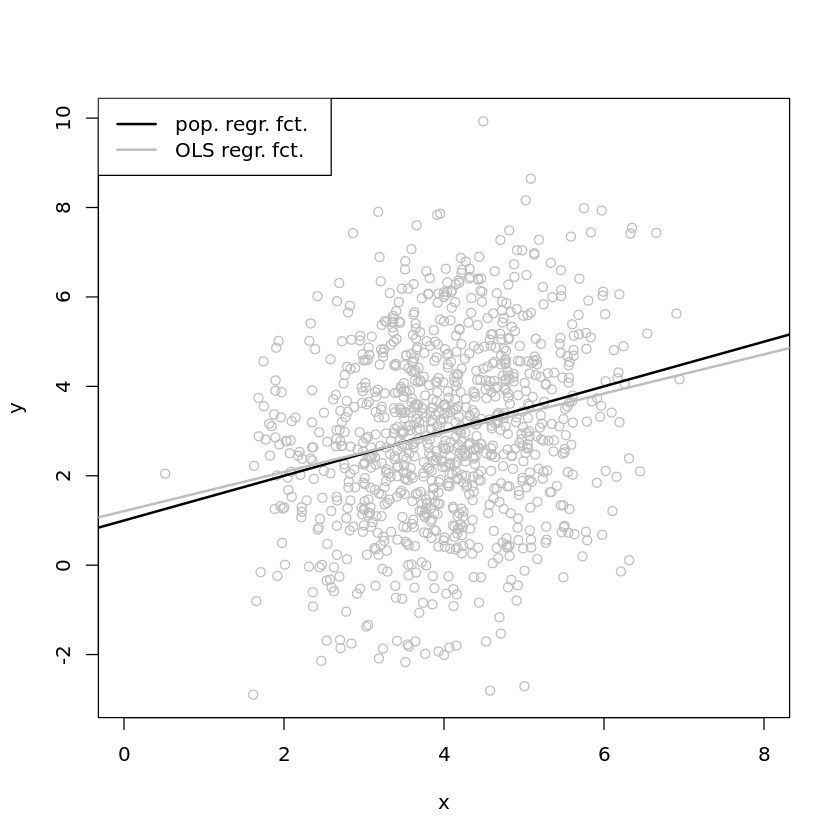

In [17]:
# Graph
plot(x, y, col="gray", xlim=c(0,8) )
abline(b0,b1,lwd=2)
abline(olsres,col="gray",lwd=2)
legend("topleft",c("pop. regr. fct.","OLS regr. fct."),
                               lwd=2,col=c("black","gray"))

Since the expected values and variances of our estimates are defined over separate random samples from the same population, it might make sense to repeat the same simulation over many simulates examples.

In [18]:
# Set the random seed
set.seed(1234567)

# set sample size and number of simulations
n<-1000; r<-10000

# set true parameters: betas and sd of u
b0<-1; b1<-0.5; su<-2

# initialize b0hat and b1hat to store results later:
b0hat <- numeric(r)
b1hat <- numeric(r)

# Draw a sample of x, fixed over replications:
x <- rnorm(n,4,1)

# repeat r times:
for(j in 1:r) {
  # Draw a sample of y:
  u <- rnorm(n,0,su)
  y <- b0 + b1*x + u
  
  # estimate parameters by OLS and store them in the vectors
  bhat <- coefficients( lm(y~x) )
  b0hat[j] <- bhat["(Intercept)"]
  b1hat[j] <- bhat["x"]
}

Average value of B0HAT: 0.9985388
Average value of B1HAT: 0.5000466
Variance of B0HAT: 0.0690833
Variance of B1HAT: 0.004069063

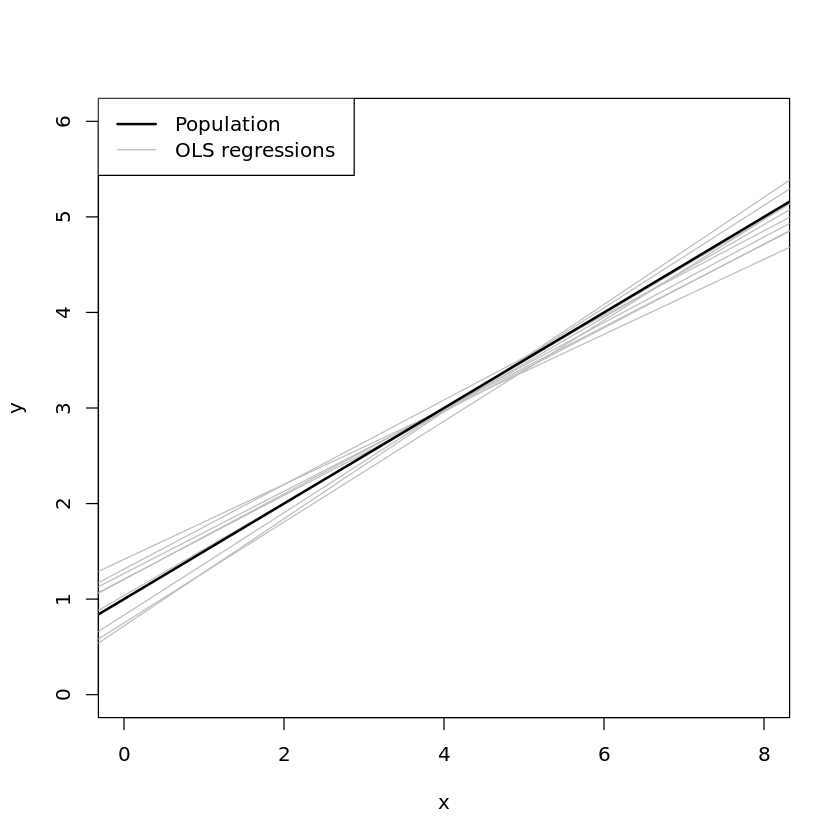

In [19]:
# MC estimate of the expected values:
cat("Average value of B0HAT:",mean(b0hat))
cat("\nAverage value of B1HAT:",mean(b1hat))

# MC estimate of the variances:
cat("\nVariance of B0HAT:",var(b0hat))
cat("\nVariance of B1HAT:",var(b1hat))

# Initialize empty plot
plot( NULL, xlim=c(0,8), ylim=c(0,6), xlab="x", ylab="y")
# add OLS regression lines
for (j in 1:10) abline(b0hat[j],b1hat[j],col="gray")
# add population regression line
abline(b0,b1,lwd=2)
# add legend
legend("topleft",c("Population","OLS regressions"),
                           lwd=c(2,1),col=c("black","gray"))

### 2-7.1 Violation of SLR.4

We will come back to a more systematic discussion of the consequences of violating the SLR.4 assumption (zero conditional mean). 

Consider a case where in the population u is not mean independent of x. A simple example is

\begin{equation}
E(u|x)=\frac{x-4}{5}
\end{equation}

What happens to the OLS estimator ? The following code presents the outputs

In [20]:
# Set the random seed
set.seed(1234567)

# set sample size and number of simulations
n<-1000; r<-10000

# set true parameters: betas and sd of u
b0<-1; b1<-0.5; su<-2

# initialize b0hat and b1hat to store results later:
b0hat <- numeric(r)
b1hat <- numeric(r)

# Draw a sample of x, fixed over replications:
x <- rnorm(n,4,1)

# repeat r times:
for(j in 1:r) {
  # Draw a sample of y:
  u <- rnorm(n, (x-4)/5, su)
  y <- b0 + b1*x + u
  
  # estimate parameters by OLS and store them in the vectors
  bhat <- coefficients( lm(y~x) )
  b0hat[j] <- bhat["(Intercept)"]
  b1hat[j] <- bhat["x"]
}

In [21]:
# MC estimate of the expected values:
cat("Estimate b0:",mean(b0hat))
cat("\nEstimate of b1:",mean(b1hat))

# MC estimate of the variances:
cat("\nEstimate of the variance of b0:",var(b0hat))
cat("\nEstimate of the variance of b1:",var(b1hat))


Estimate b0: 0.1985388
Estimate of b1: 0.7000466
Estimate of the variance of b0: 0.0690833
Estimate of the variance of b1: 0.004069063

As we appreciate the average estimates are far from the population parameters (&beta;0=1 and &beta;1=0.5)

### 2-7.2 Violation of SLR.5

Theorem 2.1 (unbiadseness) does not require Assumption SLR.5 (homoskedasticity), but Theorem 2.2 (sampling variance) does. As an example for a violation consider the population specification

\begin{equation}
Var(u_i|x_i)=\frac{4}{e^4.5}*e^{x_i}
\end{equation}

So SLR.5 is clearly violated since the variance depends on x. Assumption SLR.4 holds. 

In [22]:
# Set the random seed
set.seed(1234567)

# set sample size and number of simulations
n<-1000; r<-10000

# set true parameters: betas and sd of u
b0<-1; b1<-0.5; su<-2

# initialize b0hat and b1hat to store results later:
b0hat <- numeric(r)
b1hat <- numeric(r)

# Draw a sample of x, fixed over replications:
x <- rnorm(n,4,1)

# repeat r times:
for(j in 1:r) {
  # Draw a sample of y:
  varu <- 4/exp(4.5) * exp(x)
  u <- rnorm(n, 0, sqrt(varu) )
  y <- b0 + b1*x + u
  
  # estimate parameters by OLS and store them in the vectors
  bhat <- coefficients( lm(y~x) )
  b0hat[j] <- bhat["(Intercept)"]
  b1hat[j] <- bhat["x"]
}


In [23]:
# MC estimate of the expected values:
cat("Estimate b0:",mean(b0hat))
cat("\nEstimate of b1:",mean(b1hat))

# MC estimate of the variances:
cat("\nEstimate of the variance of b0:",var(b0hat))
cat("\nEstimate of the variance of b1:",var(b1hat))


Estimate b0: 1.0019
Estimate of b1: 0.4992376
Estimate of the variance of b0: 0.08967037
Estimate of the variance of b1: 0.007264373

The previous results reveal that: (1) the unbiadsedness provided by Theorem 2.1 is unaffected, (2) the formula for sampling variance provided by Theorem 2.2 is incorrect